In [214]:
import pandas as pd
def get_data_spam():
    data = pd.read_csv("datasets/spam.csv").values
    points = data[:, 1:].astype('float64')
    labels0 = data[:, 0]
    labels = []
    for i in labels0:
        if (i == 1):
            labels.append(1)
        else:
            labels.append(-1)
    return points, labels

def get_data_cancer():
    data = pd.read_csv("datasets/cancer.csv").values
    points = data[:, 1:].astype('float64')
    labels0 = data[:, 0]
    labels = []
    for i in labels0:
        if (i == 'M'):
            labels.append(1)
        else:
            labels.append(-1)
    return points, labels

In [225]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def h(points, labels, w, inds):
    s = 0
    for i in inds:
        s += labels[i] * points[i] / (1 + np.exp(labels[i] * (w @ points[i])))
    return s

def h1(point, w):
    if (1 / (1 + np.exp(-(w @ point))) < 0.5):
        return -1
    else:
        return 1

def logistic_regression(points, labels, epochs, batch_size):
    points = MinMaxScaler().fit_transform(points)
    w = np.random.rand(len(points[0]))
    bc = (len(points) + batch_size - 1) // batch_size
    acc = []
    for i in range(epochs):
        for j in range(bc):
            inds = range(batch_size * j, min(batch_size * (j + 1), len(points)))
            w += h(points, labels, w, inds) / len(inds)
        s = 0.0
        for i in range(len(points)):
            if (h1(points[i], w) == labels[i]):
                s += 1.0
        acc.append( s / len(points))
    return acc

In [226]:
import matplotlib.pyplot as plt
def draw_regr(acc):
    plt.plot(list(range(len(acc))), acc)
    plt.show()

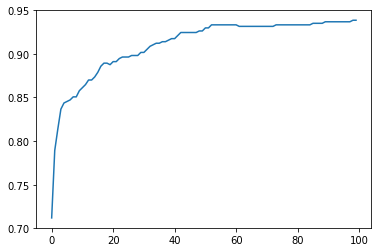

In [227]:
points, labels = get_data_cancer()
epochs = 100
batch_size = 30
acc = logistic_regression(points, labels, epochs, batch_size)
draw_regr(acc)

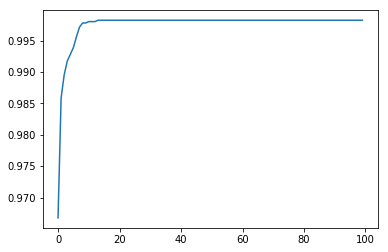

In [228]:
points, labels = get_data_spam()
epochs = 100
batch_size = 30
acc = logistic_regression(points, labels, epochs, batch_size)
draw_regr(acc)